# 2)Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd
import seaborn as sns
df=pd.read_csv("NSE-TATAGLOBAL.csv")

In [2]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [5]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


<AxesSubplot:>

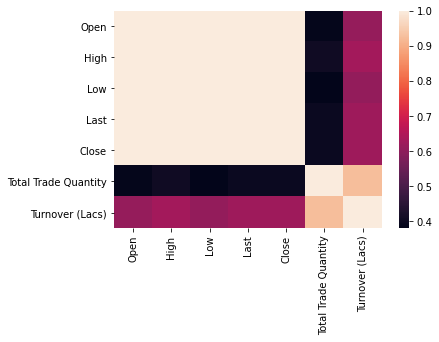

In [7]:
sns.heatmap(df.corr())

array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Last', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Total Trade Quantity', ylabel='Open'>,
        <AxesSubplot:xlabel='Turnover (Lacs)', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Last', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Total Trade Quantity', ylabel='High'>,
        <AxesSubplot:xlabel='Turnover (Lacs)', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Last', ylabel='Low'>,
        <Axes

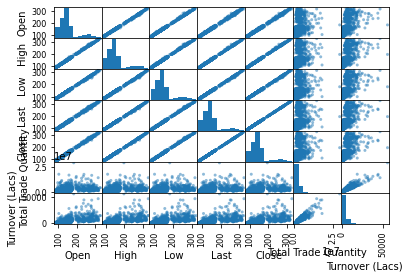

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

Open                       AxesSubplot(0.125,0.536818;0.168478x0.343182)
High                    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Low                     AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Last                    AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Close                         AxesSubplot(0.125,0.125;0.168478x0.343182)
Total Trade Quantity       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Turnover (Lacs)            AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

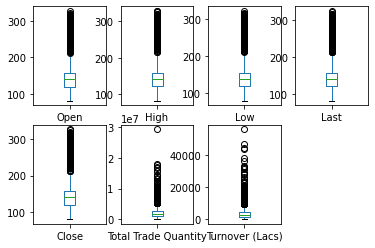

In [9]:
df.plot(kind='box',subplots=True,layout=(2,4))

In [10]:
import numpy as np
def remove_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr=q3-q1
    low_range=q1-(1.5*iqr)
    up_range=q3+(1.5*iqr)
    return low_range,up_range
low_ra,up_ra=remove_outliers(df['Open'])
df['Open']=np.where(df['Open']>up_ra,up_ra,df['Open'])
df['Open']=np.where(df['Open']<low_ra,low_ra,df['Open'])

In [11]:
low_ra,up_ra=remove_outliers(df['High'])
df['High']=np.where(df['High']>up_ra,up_ra,df['High'])
df['High']=np.where(df['High']<low_ra,low_ra,df['High'])

In [12]:
low_ra,up_ra=remove_outliers(df['Low'])
df['Low']=np.where(df['Low']>up_ra,up_ra,df['Low'])
df['Low']=np.where(df['Low']<low_ra,low_ra,df['Low'])

In [13]:
low_ra,up_ra=remove_outliers(df['Last'])
df['Last']=np.where(df['Last']>up_ra,up_ra,df['Last'])
df['Last']=np.where(df['Last']<low_ra,low_ra,df['Last'])

In [14]:
low_ra,up_ra=remove_outliers(df['Close'])
df['Close']=np.where(df['Close']>up_ra,up_ra,df['Close'])
df['Close']=np.where(df['Close']<low_ra,low_ra,df['Close'])

In [15]:
low_ra,up_ra=remove_outliers(df['Total Trade Quantity'])
df['Total Trade Quantity']=np.where(df['Total Trade Quantity']>up_ra,up_ra,df['Total Trade Quantity'])
df['Total Trade Quantity']=np.where(df['Total Trade Quantity']<low_ra,low_ra,df['Total Trade Quantity'])

In [16]:
low_ra,up_ra=remove_outliers(df['Turnover (Lacs)'])
df['Turnover (Lacs)']=np.where(df['Turnover (Lacs)']>up_ra,up_ra,df['Turnover (Lacs)'])
df['Turnover (Lacs)']=np.where(df['Turnover (Lacs)']<low_ra,low_ra,df['Turnover (Lacs)'])

Open                       AxesSubplot(0.125,0.536818;0.168478x0.343182)
High                    AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Low                     AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Last                    AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Close                         AxesSubplot(0.125,0.125;0.168478x0.343182)
Total Trade Quantity       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Turnover (Lacs)            AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

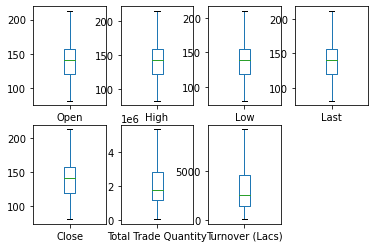

In [17]:
df.plot(kind='box',subplots=True,layout=(2,4))

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression()
x=df[['Open','High','Low','Last','Close','Total Trade Quantity']]
y=df['Turnover (Lacs)']

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
lr=lr.fit(xtrain,ytrain)

In [21]:
ypred=lr.predict(xtest)
metrics.r2_score(ytest,ypred)

0.9669923129190069